## **1. MNIST 필기체 숫자 인식(심층 신경망)**

In [11]:
# 숫자 데이터 가져오기
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
# 모델 구축하기
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

C:\anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# 학습시키기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8913 - loss: 0.3676
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9708 - loss: 0.0987
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9773 - loss: 0.0695
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9842 - loss: 0.0504
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9876 - loss: 0.0388
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9736 - loss: 0.0903


[0.06884398311376572, 0.9789999723434448]

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# 예측값 구하기
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[ 973,    0,    2,    1,    0,    0,    1,    1,    2,    0],
       [   0, 1113,    3,    1,    0,    2,    3,    0,   13,    0],
       [   0,    0, 1011,    3,    1,    0,    1,    5,   11,    0],
       [   0,    0,    3,  985,    0,   11,    0,    3,    6,    2],
       [   1,    0,    7,    0,  953,    3,    3,    2,    5,    8],
       [   2,    0,    0,    4,    0,  881,    2,    1,    1,    1],
       [   7,    2,    0,    1,    1,    5,  939,    0,    3,    0],
       [   1,    2,    7,    6,    0,    0,    0, 1006,    2,    4],
       [   5,    0,    3,    1,    0,    3,    0,    2,  958,    2],
       [   4,    2,    0,    5,    6,    2,    1,    5,   13,  971]],
      dtype=int64)

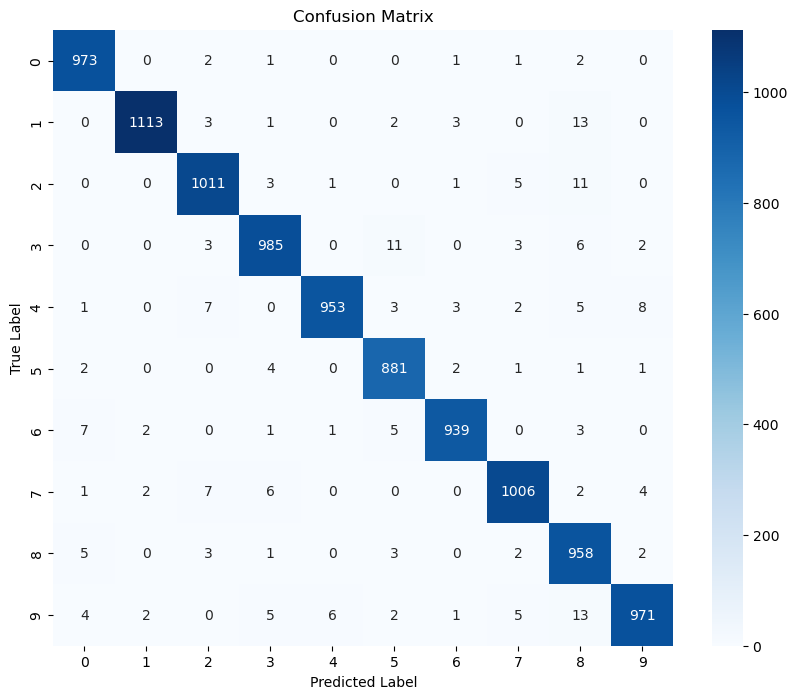

In [17]:
# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **2. MNIST 필기체 숫자 인식(컨벌루션 신경망)**

In [1]:
# 전처리
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [2]:
# 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# 컨벌루션 신경망 생성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 모델 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# 모델 훈련
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8888 - loss: 0.3545 - val_accuracy: 0.9865 - val_loss: 0.0429
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9845 - loss: 0.0505 - val_accuracy: 0.9912 - val_loss: 0.0338
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9892 - loss: 0.0333 - val_accuracy: 0.9870 - val_loss: 0.0400
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9933 - loss: 0.0218 - val_accuracy: 0.9888 - val_loss: 0.0375
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9936 - loss: 0.0194 - val_accuracy: 0.9898 - val_loss: 0.0378


In [9]:
# 테스트 세트 정확도
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n테스트 정확도: {test_acc:.4f}')

313/313 - 2s - 6ms/step - accuracy: 0.9889 - loss: 0.0356

테스트 정확도: 0.9889
